In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

In [2]:
dir = "./isi_server/output2"

In [3]:
results = pd.read_csv(dir + "/grid_search.csv")
results

,1 Month Anomaly (%) Rainfall,3 Months Anomaly (%) Rainfall,Cereals and tubers,Exchange rate (USD/LCU),FCS,Fatality,Lat,Lon,NDVI Anomaly,Population,Rainfall (mm),Ramadan,rCSI,h,val_loss,train_loss
0,NaN,11.0,96.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,76.0,1,0.282149,0.005228
1,NaN,11.0,96.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,76.0,2,1.121111,0.009716
2,NaN,11.0,96.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,76.0,3,2.191779,0.011809
3,NaN,11.0,96.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,76.0,4,3.660229,0.013327
4,NaN,11.0,96.0,NaN,71,NaN,NaN,NaN,NaN,0.0,NaN,NaN,76.0,5,6.328507,0.013360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,6.0,NaN,NaN,16.0,26,21.0,0.0,0.0,11.0,0.0,96.0,NaN,NaN,8,11.367133,0.018075
6158,6.0,NaN,NaN,16.0,26,21.0,0.0,0.0,11.0,0.0,96.0,NaN,NaN,9,12.234121,0.019259
6159,6.0,NaN,NaN,16.0,26,21.0,0.0,0.0,11.0,0.0,96.0,NaN,NaN,10,14.449616,0.016233
6160,6.0,NaN,NaN,16.0,26,21.0,0.0,0.0,11.0,0.0,96.0,NaN,NaN,11,16.225943,0.017246


In [4]:
best_loss = list()

def loss(group):
    best_loss.append(group.val_loss.min())

results.groupby("h").apply(loss);

In [5]:
np.mean(best_loss)

15.151307010000002

In [4]:
trials = pickle.load(open(dir + "/hyp_trials.p", "rb"))

In [5]:
trials

In [8]:
# Results of various trials hyperopt optimization.
loss_history = [t["result"]["loss"] for t in trials.trials]
fatality_history = [t["misc"]["vals"]["Fatality"][0] for t in trials.trials]
#batch_size_history = [t["misc"]["vals"]["batch_size"][0] for t in trials.trials]

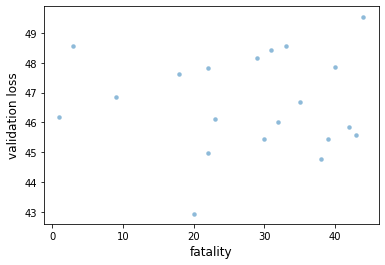

In [9]:
fig, ax = plt.subplots()
ax.scatter(fatality_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("fatality", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12);

Text(0, 0.5, 'validation loss')

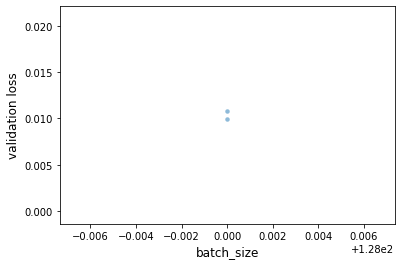

In [10]:
fig, ax = plt.subplots()
ax.scatter(batch_size_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("batch_size", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12)